In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [4]:
#load the data
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.shape

(1599, 12)

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
df=pd.DataFrame(data=df)

In [10]:
#checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
corr=df.corr()

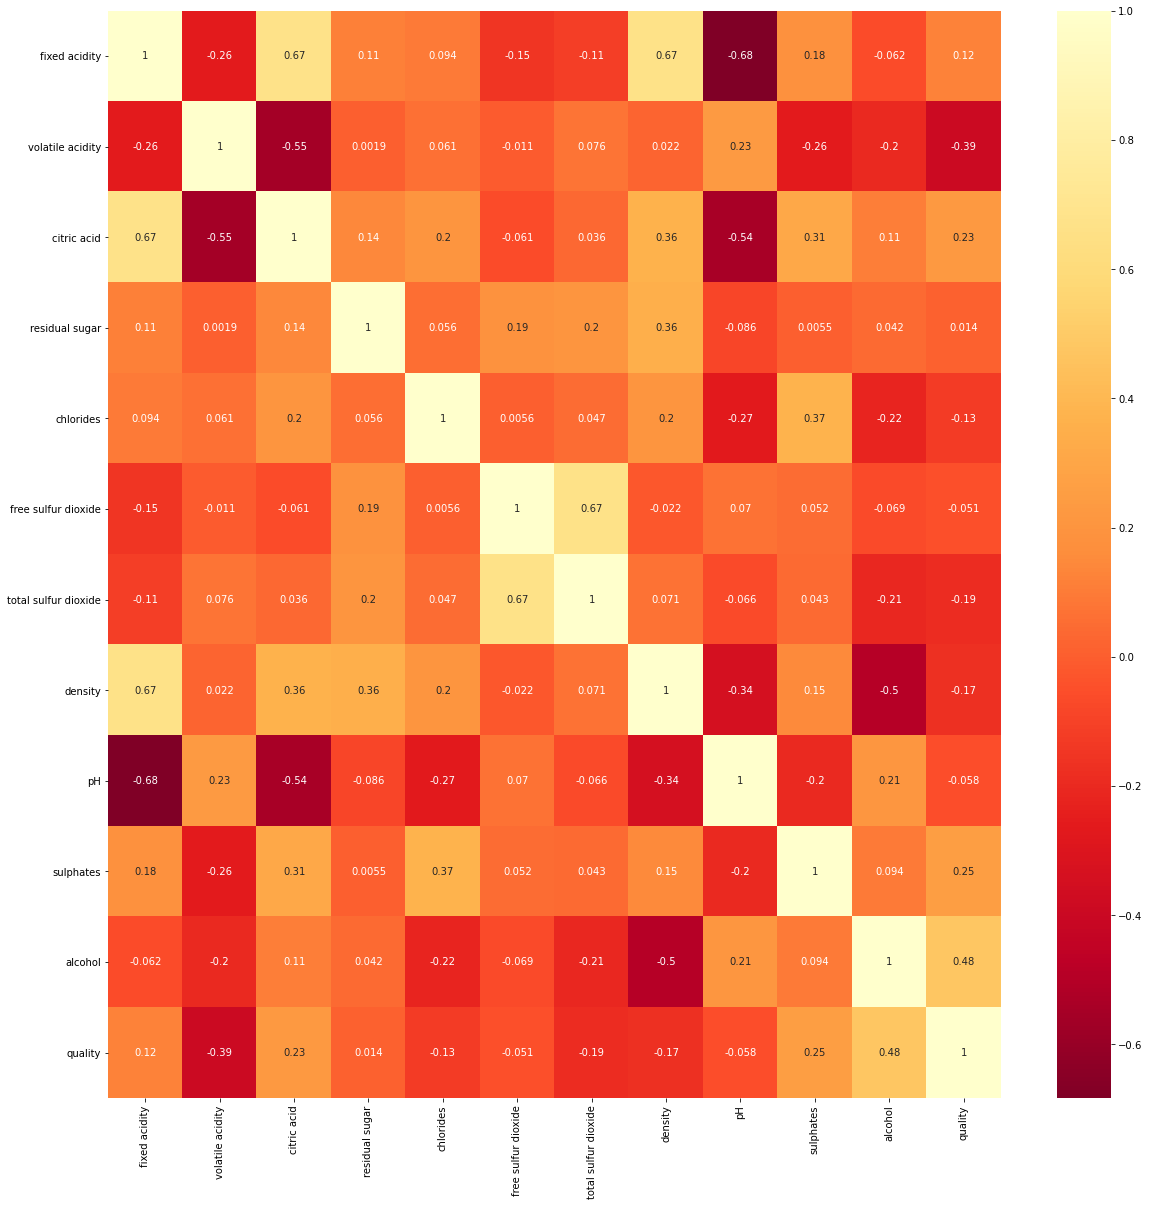

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='YlOrRd_r')
plt.show()

<AxesSubplot:xlabel='quality', ylabel='count'>

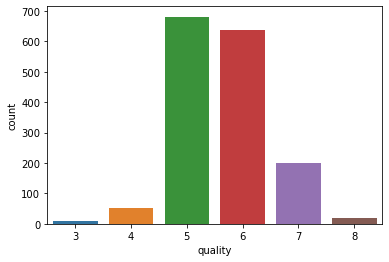

In [16]:
sns.countplot(x='quality',data=df)

In [17]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [18]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

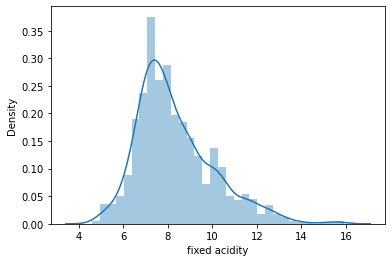

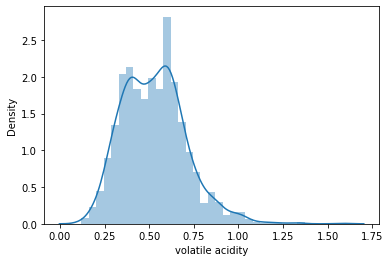

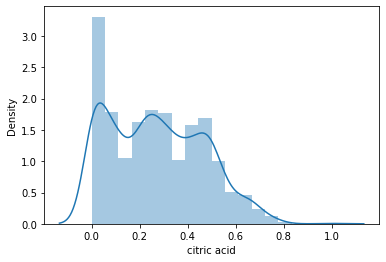

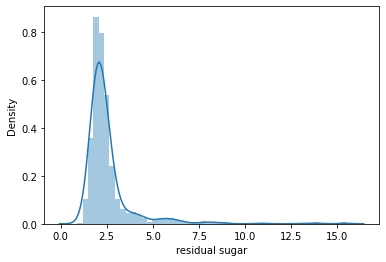

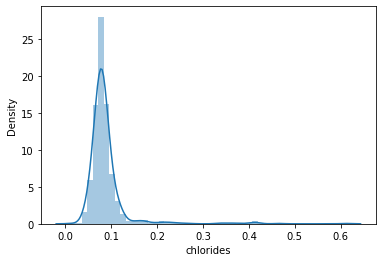

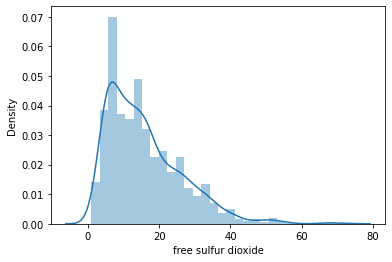

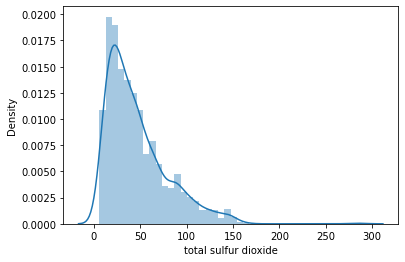

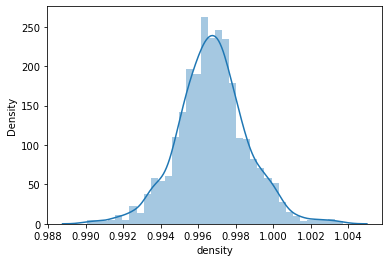

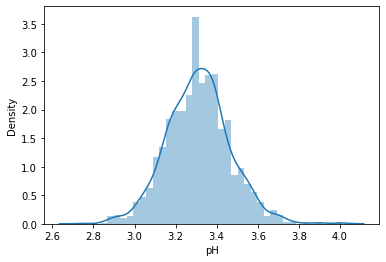

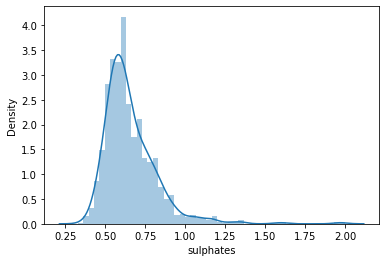

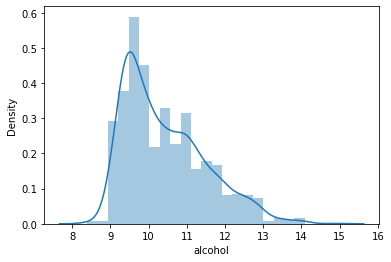

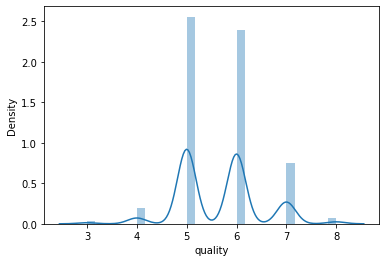

In [19]:
columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
for i in df[columns]:
    plt.figure()
    sns.distplot(df[i])

In [31]:
zscr=np.abs(zscore(df))
threshold=3
print(np.where(zscr>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [32]:
zscr[1589][3]

3.732701384742145

In [33]:
dfnew=df[(zscr<3).all(axis=1)]

In [34]:
print(df.shape,dfnew.shape)

(1599, 12) (1451, 12)


In [35]:
df=dfnew
df.shape

(1451, 12)

In [123]:
df['goodquality']=[1 if x>=7 else 0 for  x in df['quality']]

In [124]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [127]:
df_x=df.drop(columns=['quality','goodquality'])
y=df['goodquality']

In [128]:
df_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [129]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: goodquality, dtype: int64

In [40]:
for i in df_x.columns:
    if df_x[i].skew()>0.5:
        df_x[i]=np.cbrt(df_x[i])
    if df_x[i].skew()<0.5:
        df_x[i]=np.cbrt(df_x[i])    
        
        


In [41]:
df_x.skew()

fixed acidity           0.529105
volatile acidity       -0.193068
citric acid            -1.067622
residual sugar          1.629524
chlorides               1.020246
free sulfur dioxide    -0.151723
total sulfur dioxide    0.051344
density                 0.051966
pH                      0.027932
sulphates               0.523901
alcohol                 0.646678
dtype: float64

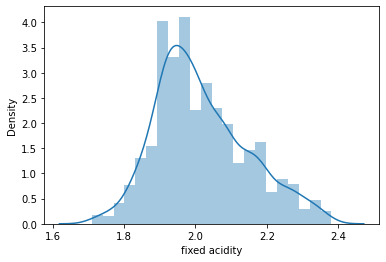

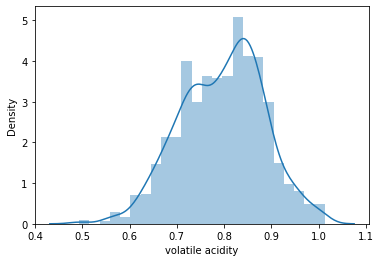

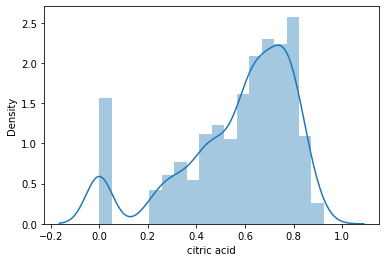

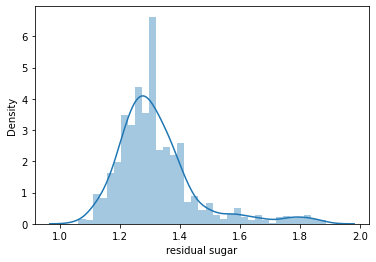

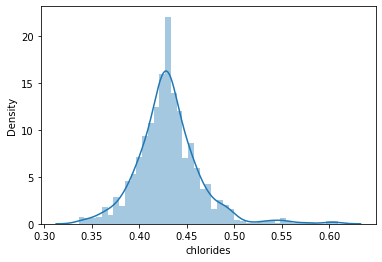

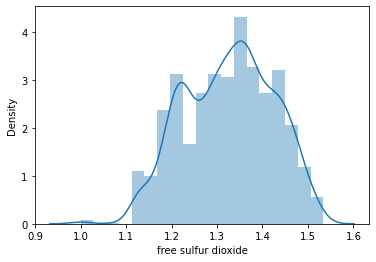

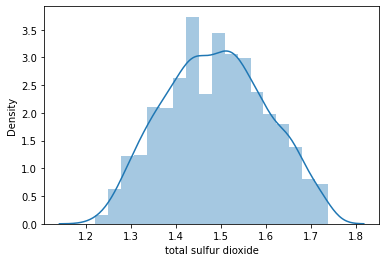

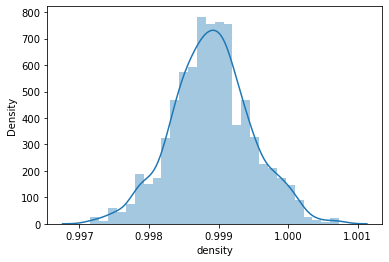

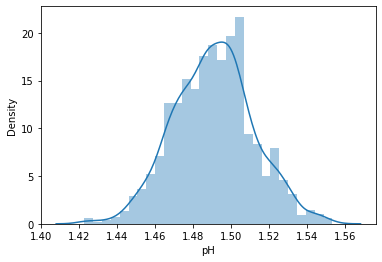

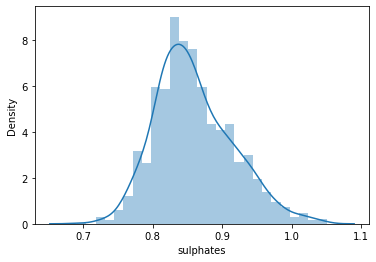

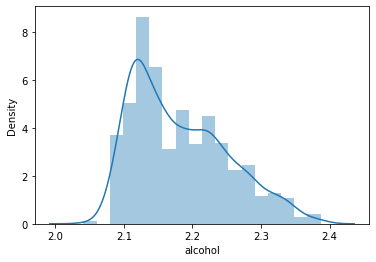

In [43]:
for i in df_x.columns:
    plt.figure()
    sns.distplot(df_x[i])

In [122]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
mms=MinMaxScaler()
x=mms.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [50]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.355700,0.759086,0.000000,0.213853,0.320182,0.571861,0.500620,0.589651,0.741117,0.370375,0.201153
1,0.407102,0.894453,0.000000,0.379809,0.457442,0.805381,0.724183,0.496222,0.388627,0.523593,0.286438
2,0.407102,0.806548,0.369951,0.312867,0.422238,0.657588,0.651255,0.514912,0.458573,0.487097,0.286438
3,0.785847,0.309609,0.891635,0.213853,0.313345,0.693028,0.686657,0.608329,0.341509,0.397338,0.286438
4,0.355700,0.759086,0.000000,0.213853,0.320182,0.571861,0.500620,0.589651,0.741117,0.370375,0.201153


In [95]:
x.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,0.457679,0.582314,0.616742,0.315071,0.346291,0.609770,0.518301,0.487732,0.520721,0.467617,0.407863
std,0.193052,0.170403,0.253328,0.165767,0.124259,0.181581,0.217099,0.160344,0.161564,0.156258,0.202144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.315919,0.456557,0.484773,0.213853,0.278215,0.452106,0.351747,0.384024,0.412039,0.356652,0.222697
50%,0.419677,0.597985,0.681456,0.289264,0.340340,0.617668,0.518815,0.486875,0.516209,0.449460,0.369434
75%,0.574264,0.700149,0.810104,0.379809,0.404060,0.753991,0.675220,0.589651,0.618508,0.570622,0.548542
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
x.shape

(1451, 11)

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [54]:
bestfeatures=SelectKBest(score_func=chi2,k=10)
fit=bestfeatures.fit(x,y)

In [55]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)

In [59]:
featurescores=pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns=['columns','Score']

In [57]:
featurescores

,columns,Score
0,fixed acidity,2.459828
1,volatile acidity,9.762594
2,citric acid,6.867799
3,residual sugar,1.485372
4,chlorides,1.444424
5,free sulfur dioxide,1.349772
6,total sulfur dioxide,9.939800
7,density,2.619966
8,pH,1.048439
9,sulphates,12.303175


In [61]:
print(featurescores.nlargest(10,'Score'))

                 columns      Score
10               alcohol  40.700152
9              sulphates  12.303175
6   total sulfur dioxide   9.939800
1       volatile acidity   9.762594
2            citric acid   6.867799
7                density   2.619966
0          fixed acidity   2.459828
3         residual sugar   1.485372
4              chlorides   1.444424
5    free sulfur dioxide   1.349772


In [62]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [63]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.355700,0.759086,0.000000,0.213853,0.320182,0.571861,0.500620,0.589651,0.741117,0.370375,0.201153
1,0.407102,0.894453,0.000000,0.379809,0.457442,0.805381,0.724183,0.496222,0.388627,0.523593,0.286438
2,0.407102,0.806548,0.369951,0.312867,0.422238,0.657588,0.651255,0.514912,0.458573,0.487097,0.286438
3,0.785847,0.309609,0.891635,0.213853,0.313345,0.693028,0.686657,0.608329,0.341509,0.397338,0.286438
4,0.355700,0.759086,0.000000,0.213853,0.320182,0.571861,0.500620,0.589651,0.741117,0.370375,0.201153


In [130]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1015, 11) (436, 11) (1015,) (436,)


In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [132]:
lg=LogisticRegression()
sv=SVC()
gnb=GaussianNB()
mnb=MultinomialNB()
rf=RandomForestClassifier()
ad=AdaBoostClassifier(n_estimators=100)
gd=GradientBoostingClassifier()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [133]:
model=[lg,sv,gnb,mnb,rf,ad,gd,dtc,knn]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("Accuracy_score of",m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())

Accuracy_score of LogisticRegression()
0.8738532110091743
[[362  11]
 [ 44  19]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       373
           1       0.63      0.30      0.41        63

    accuracy                           0.87       436
   macro avg       0.76      0.64      0.67       436
weighted avg       0.85      0.87      0.85       436

[0.87285223 0.85862069 0.9        0.87931034 0.87586207]
0.8773290674250503
Accuracy_score of SVC()
0.8715596330275229
[[359  14]
 [ 42  21]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       373
           1       0.60      0.33      0.43        63

    accuracy                           0.87       436
   macro avg       0.75      0.65      0.68       436
weighted avg       0.85      0.87      0.86       436

[0.88316151 0.84827586 0.9137931  0.87931034 0.87241379]
0.8793909230951534
Accuracy_score of GaussianNB()
0.83027522935779

In [134]:
estimators=[]
estimators.append(('knn',KNeighborsClassifier()))
estimators.append(('svc',SVC(gamma='auto',probability=True)))
estimators.append(('dtc',DecisionTreeClassifier()))
estimators.append(('gd',GradientBoostingClassifier()))
estimators.append(('mnb',MultinomialNB()))
from sklearn.ensemble import VotingClassifier

In [135]:
vot_hard=VotingClassifier(estimators=estimators,voting='hard')
vot_hard.fit(x_train,y_train)
y_pred=vot_hard.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

0.8853211009174312

In [136]:
vot_soft=VotingClassifier(estimators=estimators,voting='soft')
vot_soft.fit(x_train,y_train)
y_pred=vot_soft.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

0.8876146788990825

In [139]:
import xgboost as xgb

In [141]:
xgboost=xgb.XGBClassifier(random_state=1,use_label_encoder=False)
xgboost.fit(x_train,y_train)
y_pred=xgboost.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[13:47:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8990825688073395
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       373
           1       0.66      0.63      0.65        63

    accuracy                           0.90       436
   macro avg       0.80      0.79      0.79       436
weighted avg       0.90      0.90      0.90       436



In [142]:
#RandomForestClassifier model performs well
joblib.dump(rf,'rfwine.obj')

['rfwine.obj']

In [143]:
rffile=joblib.load('rfwine.obj')
rffile.predict(x_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)